In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df= pd.read_csv("insurance.csv")

print(df.isnull().sum())

print("\nUnique values in categorical columns:")
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Unique values in categorical columns:
sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [30]:
df_before = df.copy()
df_before['sex'] = df_before['sex'].map({'male': 1, 'female': 0})
df_before['smoker'] = df_before['smoker'].map({'yes': 1, 'no': 0})
df_before = pd.get_dummies(df_before, columns=['region'], drop_first=True)

In [31]:
X_before = df_before.drop('charges', axis=1)
y_before = df_before['charges']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_before, y_before, test_size=0.2, random_state=42)

model_before = LinearRegression()
model_before.fit(X_train_b, y_train_b)
pred_before = model_before.predict(X_test_b)

print("\nPerformance Before Cleaning:")
print("R2 Score:", r2_score(y_test_b, pred_before))
print("Mean Squared Error:", mean_squared_error(y_test_b, pred_before))


Performance Before Cleaning:
R2 Score: 0.7835929767120723
Mean Squared Error: 33596915.85136146


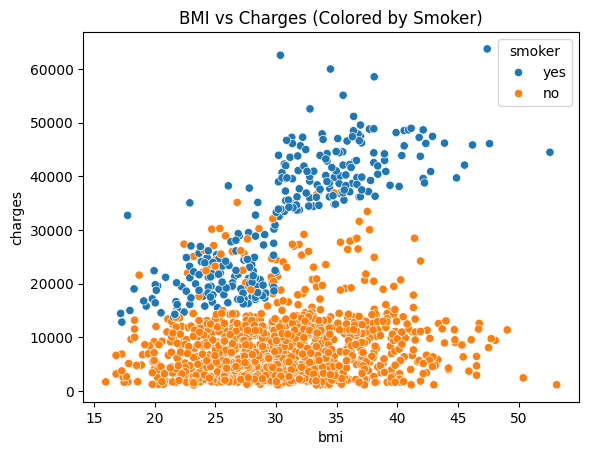

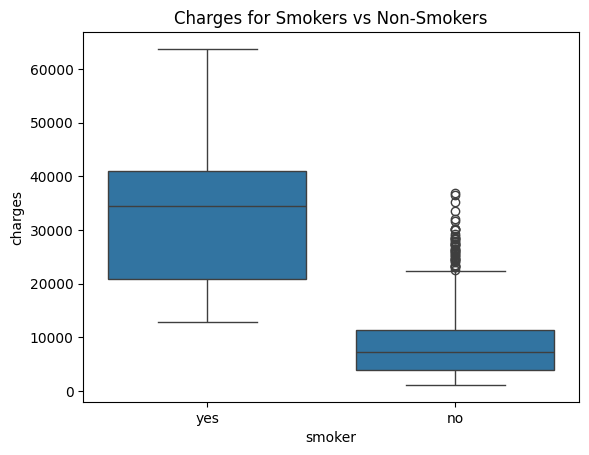

In [33]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title("BMI vs Charges (Colored by Smoker)")
plt.show()

sns.boxplot(data=df, x='smoker', y='charges')
plt.title("Charges for Smokers vs Non-Smokers")
plt.show()

In [34]:
df = pd.read_csv("insurance.csv")
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df['bmi_smoker'] = df['bmi'] * df['smoker']

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model_after = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
model_after.fit(X_train, y_train)
y_pred = model_after.predict(X_test)

print("\nPerformance After Cleaning:")
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Performance After Cleaning:
R2 Score: 0.8689716182949836
Mean Squared Error: 20341990.049123693


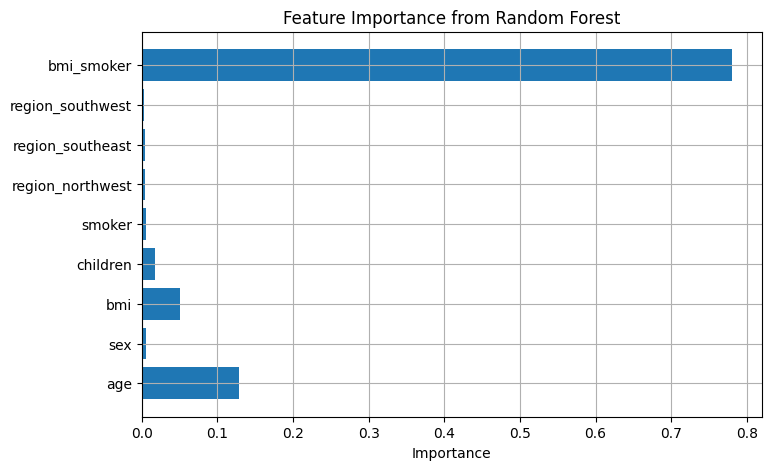

In [36]:
importances = model_after.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.grid(True)
plt.show()